# **Entrega 1: Modelo de Sistemas 1**


### **Integrantes:**
- *María Cristina Vergara Quinchia*
- *Kevin Estrada Del Valle*
- *Juan Andrés Rivera Arango*


### **1. Conexión de la tabla de Kaggle con Google Drive**

In [1]:
# Conectar Google Drive para cargar las columnas de la tabla a analizar
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Se guarda en la variable 'z' la tabla para ser manipulada a nuestra conveniencia
z = pd.read_csv('/content/drive/MyDrive/Modelos/train.csv')

## **Análisis Filtrando:**

In [4]:
# Prueba para mostrar las primeras 5 filas de la tabla
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo


In [5]:
# Recuento de estudiantes en cada clase de rendimiento global
z['RENDIMIENTO_GLOBAL'].value_counts()

alto          175619
bajo          172987
medio-bajo    172275
medio-alto    171619
Name: RENDIMIENTO_GLOBAL, dtype: int64

In [6]:
# Distribución de los estudiantes por localidades o departamentos
z['ESTU_PRGM_DEPARTAMENTO'].value_counts()

BOGOTÁ             282159
ANTIOQUIA           83607
VALLE               44588
ATLANTICO           41020
SANTANDER           28828
NORTE SANTANDER     22588
BOLIVAR             20629
BOYACA              14048
CUNDINAMARCA        14018
NARIÑO              13454
RISARALDA           12679
CORDOBA             12188
TOLIMA              11921
CALDAS              11640
CAUCA               11471
HUILA                9995
MAGDALENA            9512
SUCRE                8674
CESAR                8279
QUINDIO              8229
META                 7910
LA GUAJIRA           4778
CHOCO                4289
CAQUETA              2659
CASANARE             1852
PUTUMAYO              795
ARAUCA                589
AMAZONAS               40
GUAVIARE               37
VAUPES                 14
SAN ANDRES             10
Name: ESTU_PRGM_DEPARTAMENTO, dtype: int64

In [7]:
from tabulate import tabulate

# Relación entre el programa académico y el departamento del estudiante
programa_departamento = z.groupby(['ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO']).size().reset_index(name='Count')
print("Relación entre el programa académico y el departamento del estudiante:")
print(tabulate(programa_departamento, headers='keys', tablefmt='pretty'))

# Relación entre el estrato de vivienda y el nivel de rendimiento global
estrato_rendimiento = z.groupby(['FAMI_ESTRATOVIVIENDA', 'RENDIMIENTO_GLOBAL']).size().reset_index(name='Count')
print("\nRelación entre el estrato de vivienda y el nivel de rendimiento global:")
print(tabulate(estrato_rendimiento, headers='keys', tablefmt='pretty'))


Relación entre el programa académico y el departamento del estudiante:
+------+---------------------------------------------------------------------------------------------------------------+------------------------+-------+
|      |                                              ESTU_PRGM_ACADEMICO                                              | ESTU_PRGM_DEPARTAMENTO | Count |
+------+---------------------------------------------------------------------------------------------------------------+------------------------+-------+
|  0   |                                3°  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES                                 |       ANTIOQUIA        |  69   |
|  1   |                                          ACTIVIDAD FISICA Y DEPORTE                                           |       ANTIOQUIA        |  162  |
|  2   |                                                  ACUICULTURA                                                  |        CORDOBA         |  79   |
|  3 

### **Gráfico de Barras:**
Se genera un gráfico de barras que muestra la distribución del estrato de vivienda de los estudiantes y un gráfico de barras apilado que muestra la cantidad de estudiantes en cada estrato de vivienda, divididos por si tienen o no acceso a Internet.



<ipython-input-8-b9508b245bb4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=z, x='FAMI_ESTRATOVIVIENDA', palette='viridis')


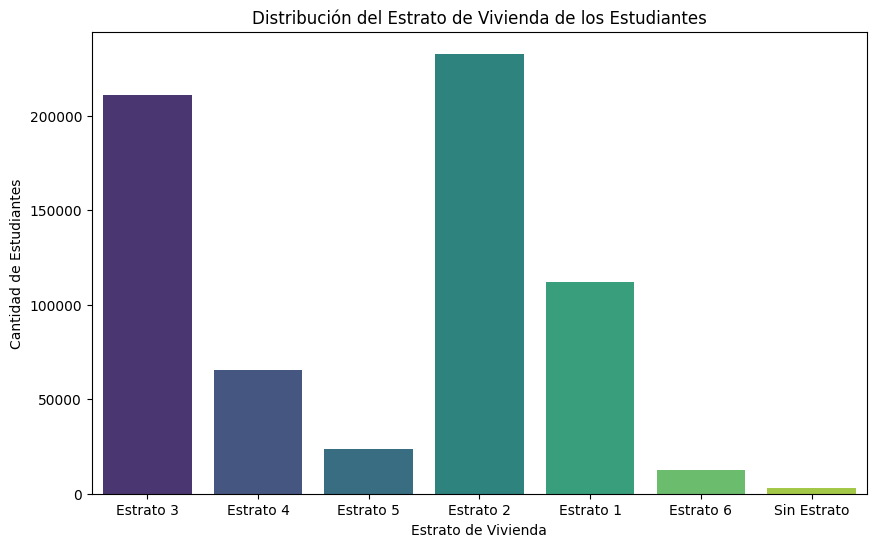

In [8]:
# Se genera un gráfico de barras que muestra la distribución del estrato de vivienda de los estudiantes

plt.figure(figsize=(10, 6))
sns.countplot(data=z, x='FAMI_ESTRATOVIVIENDA', palette='viridis')
plt.title('Distribución del Estrato de Vivienda de los Estudiantes')
plt.xlabel('Estrato de Vivienda')
plt.ylabel('Cantidad de Estudiantes')
plt.show()

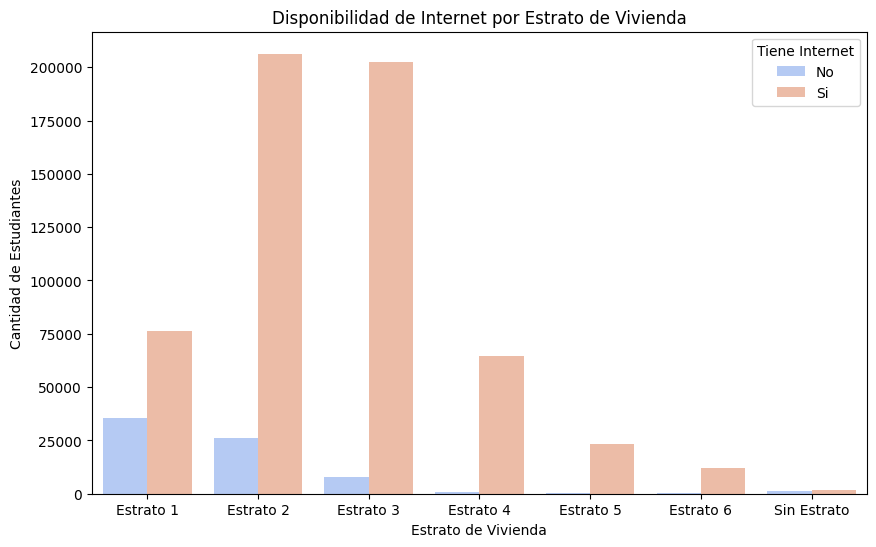

In [9]:
# Crear un DataFrame que contenga la información necesaria
internet_df = z[['FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'ID']].groupby(['FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET']).count().reset_index()
internet_df.rename(columns={'ID': 'Count'}, inplace=True)

# Crear un gráfico de barras apilado
plt.figure(figsize=(10, 6))
sns.barplot(data=internet_df, x='FAMI_ESTRATOVIVIENDA', y='Count', hue='FAMI_TIENEINTERNET', palette='coolwarm')
plt.title('Disponibilidad de Internet por Estrato de Vivienda')
plt.xlabel('Estrato de Vivienda')
plt.ylabel('Cantidad de Estudiantes')
plt.legend(title='Tiene Internet', loc='upper right')
plt.show()


## **Estadística Descriptiva:**
Calcular estadísticas descriptivas del rendimiento global por nivel educativo del padre para encontrar información sobre posibles correlaciones entre la educación de los padres y el desempeño académico de los estudiantes.







In [10]:
rendimiento_por_educacion_padre = z.groupby('FAMI_EDUCACIONPADRE')['RENDIMIENTO_GLOBAL'].describe()

print(rendimiento_por_educacion_padre)


                                       count unique         top   freq
FAMI_EDUCACIONPADRE                                                   
Educación profesional completa         83117      4        alto  33397
Educación profesional incompleta       27084      4        alto   9473
Ninguno                                22008      4        bajo   9714
No Aplica                               9229      4  medio-alto   2455
No sabe                                16592      4        alto   5060
Postgrado                              44169      4        alto  23856
Primaria completa                      55958      4        bajo  17647
Primaria incompleta                   125675      4        bajo  42457
Secundaria (Bachillerato) completa    128289      4  medio-alto  34345
Secundaria (Bachillerato) incompleta   71654      4  medio-bajo  19727
Técnica o tecnológica completa         62995      4        alto  18416
Técnica o tecnológica incompleta       22552      4  medio-alto   5925


## **Histograma:**
El código genera un histograma que muestra la distribución del rendimiento global de los estudiantes. Cada barra en el histograma representa un rango de valores de rendimiento global, y la altura de cada barra representa la frecuencia con la que ocurre ese rango de valores en los datos.





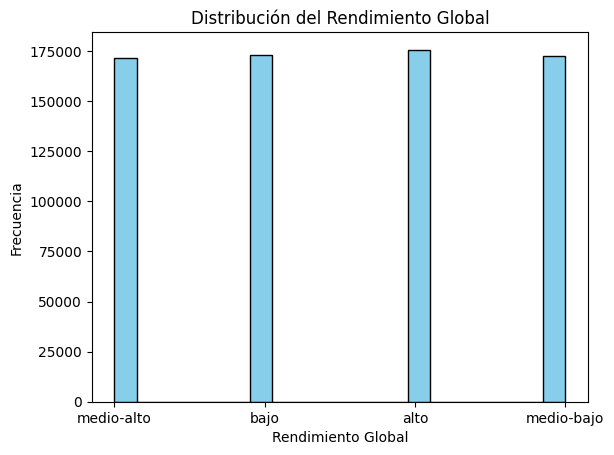

In [11]:
plt.hist(z['RENDIMIENTO_GLOBAL'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Rendimiento Global')
plt.ylabel('Frecuencia')
plt.title('Distribución del Rendimiento Global')
plt.show()

## **Diagrama de Caja:**
El código genera un diagrama de caja que muestra la distribución del rendimiento global de los estudiantes según su estrato socioeconómico. Cada caja en el diagrama representa la distribución del rendimiento global dentro de un estrato socioeconómico específico. Los extremos de las cajas representan el rango intercuartílico, mientras que la línea dentro de la caja representa la mediana. Los "bigotes" muestran la extensión de los datos, excluyendo los valores atípicos.





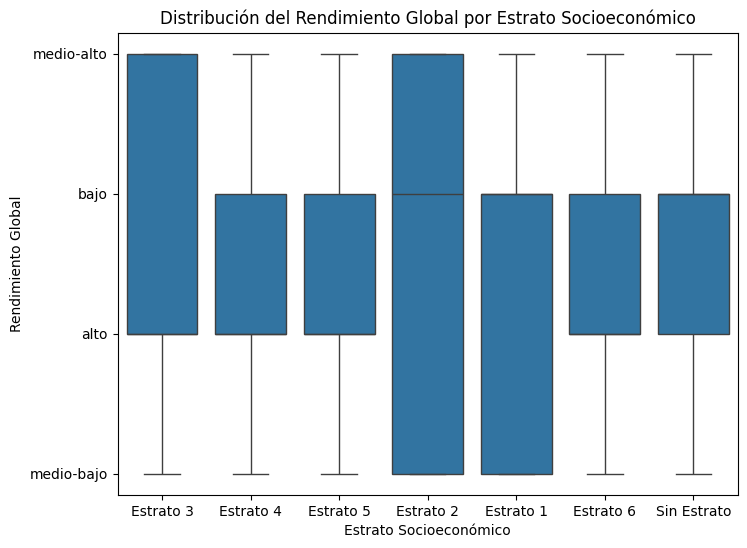

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='FAMI_ESTRATOVIVIENDA', y='RENDIMIENTO_GLOBAL', data=z)
plt.xlabel('Estrato Socioeconómico')
plt.ylabel('Rendimiento Global')
plt.title('Distribución del Rendimiento Global por Estrato Socioeconómico')
plt.show()

## **Gráfico de Lineas:**
El código genera un gráfico de líneas que muestra las tendencias del rendimiento global promedio de los estudiantes a lo largo de los diferentes períodos. Cada punto en el gráfico representa el rendimiento global promedio en un período específico, mientras que las líneas conectan estos puntos para resaltar las tendencias a lo largo del tiempo.



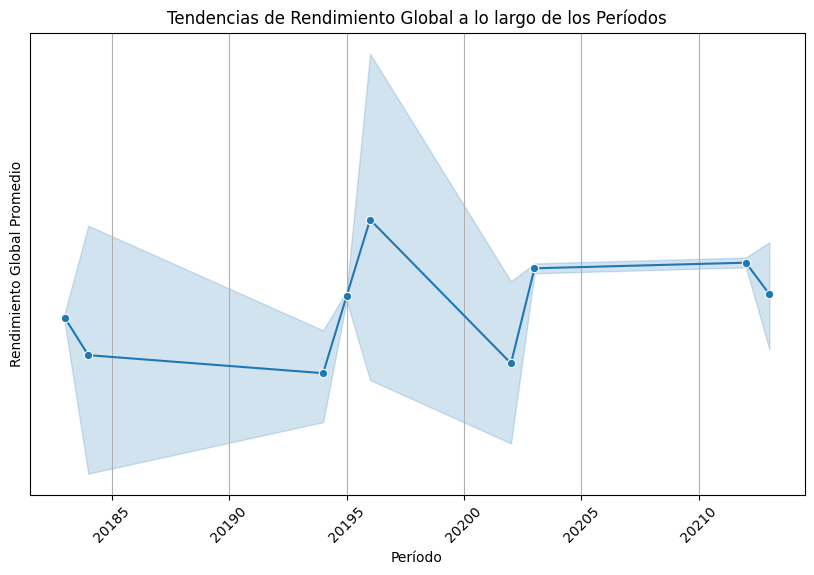

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='PERIODO', y='RENDIMIENTO_GLOBAL', data=z, marker='o')
plt.xlabel('Período')
plt.ylabel('Rendimiento Global Promedio')
plt.title('Tendencias de Rendimiento Global a lo largo de los Períodos')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
